In [1]:
import pandas_datareader.data as web
import pandas as pd
import quandl
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from implied_to_realized import SPX5MinuteBars
from matplotlib.ticker import FormatStrFormatter
import pandas_datareader.data as web
import statsmodels.formula.api as sm

bars = SPX5MinuteBars(update_bars=False)

# HAR Volatility forecast
Realized volatility is the summation of high frequency returns:
$$RV_{t}=\sum_{i=1}^M r^{2}_{t,i}$$
Where $M=\frac {1}{\Delta}$ and the $\Delta$ period intraday return is defined by:
$$r_{t,i}=log(P_{t-1+i\Delta}) - log(P_{t-1+(i-1)\Delta})$$
The HAR model (Corsi, 2009) can be defined as:
$$RV_{d,t}=\beta + \beta_{d}RV_{d,t-1}+\beta_{w}RV_{w,t-1}+\beta_{m}RV_{m,t-1}+U_{t}$$
based on a 500 day rolling window.

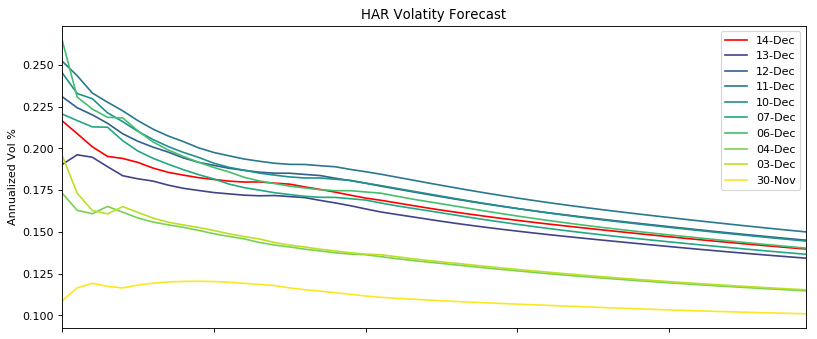

In [9]:
bars.plot_vol_forecast()

Forecasting regressions for volatility risk premium

In [144]:
[sp500, vix] = [web.get_data_yahoo(item, 'JAN-01-90') for item in ['^GSPC', '^VIX']]
vix = vix['Close']
IV = vix**2 / 12
sp5_ret= sp500['Adj Close'].resample('BM', closed='left').ffill().pct_change().dropna()
sp5_ret = sp5_ret.rename('sp5_ret')

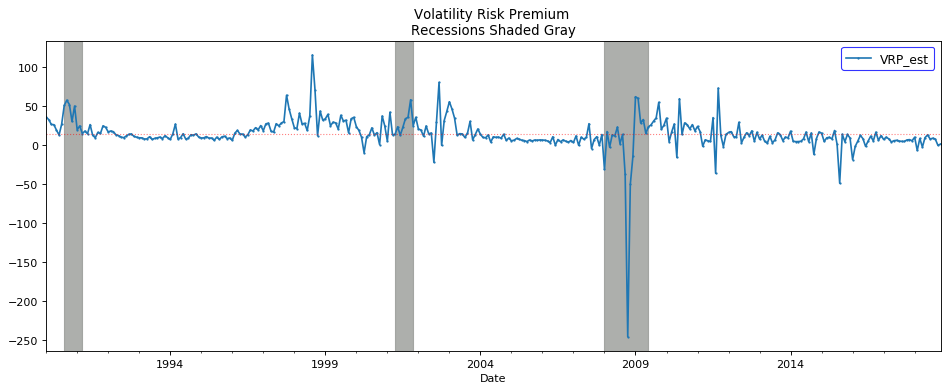

In [147]:
rv = bars.realized_variance() * 10000
vrp = bars.vol_risk_premium

rv_estimate = rv.resample('BM', closed='left').ffill().dropna().combine_first(vrp['RV'])
vrp_estimate = IV.resample('BM', closed='left').ffill().dropna() - rv_estimate
vrp_estimate = vrp_estimate.rename('VRP_est')
fig, ax = plt.subplots(figsize=(12, 5), dpi= 80, facecolor='w', edgecolor='k')

ax = vrp_estimate.plot(legend=True, marker='o', ms=1)
recession_dates = web.DataReader(['USREC'], 'fred',pd.datetime(1950, 1, 1))
recession_dates = recession_dates.resample('BM', closed='left').ffill().reindex(vrp_estimate.index)

start_idx = np.where(((df.USREC != df.USREC.shift(1)) & df.USREC).values)[0]     
end_idx = np.where(((df.USREC != df.USREC.shift(-1)) & df.USREC).values)[0]
recession_start = recession_dates.index[start_idx]
recession_end = recession_dates.index[end_idx]
for start, end in zip(recession_start, recession_end):
    ax.axvspan(start, end, color=sns.xkcd_rgb['grey'], alpha=0.75)
ax.set_title('Volatility Risk Premium' + ' \nRecessions Shaded Gray')
ax.axhline(vrp_estimate.mean(), color='r', linestyle=':', linewidth=1, alpha=0.5)
ax.legend(loc='upper right', fontsize=11, frameon=True).get_frame().set_edgecolor('blue') 
plt.autoscale(enable=True, axis='x', tight=True)
plt.tight_layout()

In [148]:

regression_data = pd.concat([sp5_ret, vrp_estimate.shift(1)], axis=1)

regression_data = regression_data.dropna(axis=0, how='any')
regression_string = 'sp5_ret ~ VRP_est'
results = sm.ols(formula=regression_string, data=regression_data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                sp5_ret   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     21.39
Date:                Sun, 16 Dec 2018   Prob (F-statistic):           5.31e-06
Time:                        17:19:42   Log-Likelihood:                 628.44
No. Observations:                 346   AIC:                            -1253.
Df Residuals:                     344   BIC:                            -1245.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0003      0.003      0.108      0.914      -0.005       0.005
VRP_est        0.0005   9.78e-05      4.625      0.000       0.000       0.001
==============================================================================
Omnibus:                       46.155   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.268
Skew:                          -0.824   Prob(JB):                     2.03e-16
Kurtosis:                       4.515   Cond. No.                         31.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [132]:
vrp['ERV']
evol.iloc[0,:]

2006-02-09    0.090158
2006-02-10    0.090683
2006-02-13    0.087782
2006-02-14    0.086845
2006-02-15    0.091423
2006-02-16    0.088793
2006-02-17    0.079716
2006-02-21    0.084351
2006-02-22    0.080557
2006-02-23    0.080839
2006-02-24    0.074377
2006-02-27    0.075741
2006-02-28    0.083970
2006-03-01    0.080837
2006-03-02    0.084691
2006-03-03    0.093319
2006-03-06    0.091178
2006-03-07    0.090822
2006-03-08    0.093100
2006-03-09    0.087366
2006-03-10    0.087930
2006-03-13    0.084857
2006-03-14    0.080849
2006-03-15    0.077216
2006-03-16    0.079153
2006-03-17    0.073242
2006-03-20    0.073795
2006-03-21    0.076787
2006-03-22    0.076700
2006-03-23    0.075961
                ...   
2018-11-01    0.198984
2018-11-02    0.199263
2018-11-05    0.132571
2018-11-06    0.117198
2018-11-07    0.165436
2018-11-08    0.125986
2018-11-09    0.136985
2018-11-12    0.154529
2018-11-13    0.182553
2018-11-14    0.186917
2018-11-15    0.205345
2018-11-16    0.170510
2018-11-19 

In [138]:
df.index[start[0]]

TypeError: 'Timestamp' object does not support indexing

In [28]:
fig, ax = plt.subplots(figsize=(12, 5), dpi= 80, facecolor='w', edgecolor='k')

evol = bars.expected_vol() * 100
evol.iloc[0,:].plot()
vrp['ERV'].plot()
foo=pd.concat([evol.iloc[0,:].resample('BM', closed='left').ffill().dropna(), vrp['ERV']], axis=1)
foo.diff().corr()


,USREC
DATE,
1950-01-01,0
1950-02-01,0
1950-03-01,0
1950-04-01,0
1950-05-01,0
1950-06-01,0
1950-07-01,0
1950-08-01,0
1950-09-01,0
